# Helper to view Output data

In [1]:
import os
import pandas as pd

from sciplot import sciplot
%matplotlib inline

In [2]:
NAME = "batch-2"
IS_BATCH = True
IS_PARAMETRIC = False

base_folder = os.getcwd()
output_folder = os.path.join(base_folder, 'output')
result_folder = os.path.join(output_folder, NAME)

print(f"Reading info of {result_folder}")

Reading info of /home/enrique/Desktop/git-repos/PoF_Simulation_PYTHON/output/batch-2


In [3]:
print("Processing results...")
if IS_BATCH:
    # Read mean-result csv:
    mean_result_csv = os.path.join(result_folder, 'output-result.csv')
    df_mean_result = pd.read_csv(mean_result_csv)
    print("Mean results of batch execution:")
    print(df_mean_result.T)
    print("-------")    
elif IS_PARAMETRIC:
    print("Plotting parametric result!")
else:
    print("What is?")

Processing results...
Mean results of batch execution:
                                       0
small_cell_ocupacy              3.770620
small_cell_overflow             3.736162
small_cell_consumption[W]       3.450903
throughput[mbps]             2191.950168
throughput_no_battery[mbps]  1131.134095
throughput_only_macro[mbps]    61.359021
battery_mean[Ah]                2.652345
NMacroCells                     3.000000
NFemtoCells                    20.000000
per_served_femto               23.056000
per_in_area                    25.654300
per_time_served                63.535600
first_batt_dead[s]           1335.200000
last_batt_dead[s]            2088.200000
remaining_batt                  9.200000
-------


Batch execution with 5 simulations


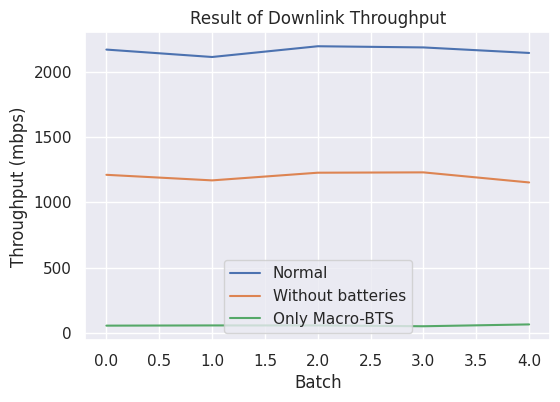

----
% of time served by a femto-Cell: 
0    22.127
1    22.101
2    21.515
3    22.422
4    21.674
Name: per_served_femto, dtype: float64 

% of time in area of femto-Cell: 
0    25.960
1    25.866
2    24.280
3    26.614
4    25.692
Name: per_in_area, dtype: float64 

% of time in area of femto-Cell, and served by femto-Cell: 
0    85.067
1    85.801
2    87.766
3    83.743
4    84.853
Name: per_time_served, dtype: float64 



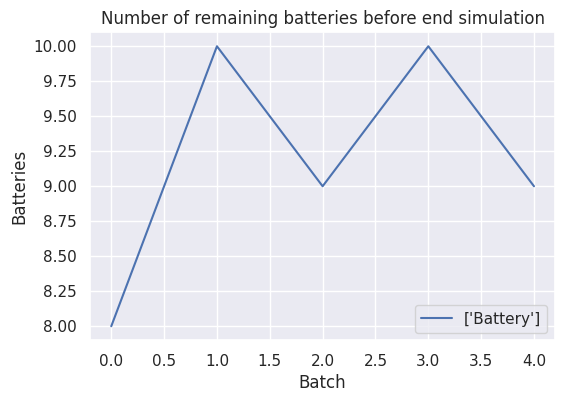

In [20]:
if IS_BATCH:
    # Read simulations means and show plot
    output_simulations_csv = os.path.join(result_folder, 'output-simulations.csv')
    df_simulations = pd.read_csv(output_simulations_csv)
    print(f"Batch execution with {df_simulations.shape[0]} simulations")
    
    # Plot Throughput Downlink
    traces = []
    traces.append(df_simulations['throughput[mbps]'])
    traces.append(df_simulations['throughput_no_battery[mbps]'])
    traces.append(df_simulations['throughput_only_macro[mbps]'])
    sciplot(x=range(0,df_simulations.shape[0]), y=traces,
            xlabel='Batch', ylabel='Throughput (mbps)', title='Result of Downlink Throughput',
            grid=True, style='dark', legend=True, label=['Normal', 
                                                         'Without batteries', 
                                                         'Only Macro-BTS'])
    
    # Show Percentages
    print("----")
    print(f"% of time served by a femto-Cell: \n{df_simulations['per_served_femto'].T} \n" )
    print(f"% of time in area of femto-Cell: \n{df_simulations['per_in_area'].T} \n" )
    print(f"% of time in area of femto-Cell, and served by femto-Cell: \n{df_simulations['per_time_served'].T} \n" )
    
    # Show remaining batt
    sciplot(x=range(0,df_simulations.shape[0]), y=df_simulations['remaining_batt'],
            xlabel='Batch', ylabel='Batteries', title='Number of remaining batteries before end simulation',
            grid=True, style='dark', legend=True, label=['Battery'])
    
elif IS_PARAMETRIC:
    print("Plotting parametric result!")
else:
    print("What is?")
